# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

函数优化

In [1]:
def sigmoid(x):
    
    res = np.zeros_like(x)
    fenzi = np.where(x >= 0, 1, np.exp(x))
    fenmu = 1 + np.exp(-abs(x))
    res = fenzi/fenmu
    
    return res

def softplus(x):
    
    res = np.zeros_like(x)
    part1 = np.where(x >= 0, x, 0)
    part2 = np.log(1 + np.exp(-abs(x)))
    res = part1 + part2
    
    return res

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [2]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [2]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [3]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [4]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [5]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [6]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [7]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [ ]:
print(vec[1:3])

In [ ]:
print(mat[:, :2])

在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [ ]:
np.random.seed(123)

生成均匀分布随机数：

In [4]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.79129756 0.41884641 0.77571424 0.76655837 0.63053495]


正态分布随机数：

In [2]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 1.38527438  1.24157581  1.06588396 -1.05407846  0.30684455]
 [-0.72928855 -0.71891888 -0.02470985  0.4677995   0.15511783]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [3]:
print(np.exp(norm))

[[3.99592217 3.46106316 2.90340436 0.34851345 1.35912967]
 [0.48225197 0.48727878 0.97559294 1.59647728 1.16779555]]


In [5]:
print(np.log(unif))

[-0.2340812  -0.870251   -0.25397108 -0.26584443 -0.46118669]


也可以对向量和矩阵进行汇总：

In [6]:
np.sum(unif)

3.382951526841837

In [7]:
np.mean(norm)

0.20955003086007712

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [8]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

array([ 0.32799292,  0.26132847,  0.52058706, -0.29313948,  0.23098119])

In [9]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([0.81332897, 0.22954293])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [21]:
x = np.random.random(size = 10000)
print(x[:10]

[0.78840117 0.58949605 0.21367558 0.15378025 0.36260301 0.02038221
 0.21472246 0.71624053 0.41217602 0.44269985]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [32]:
y = -np.log(x)
print(y[-10:])

[0.3594694  2.09265153 2.68976945 2.18469041 0.2243294  1.2617365
 0.62913118 0.06807847 0.06850428 0.93686872]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

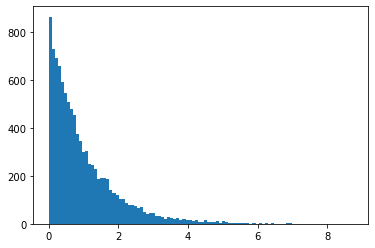

In [50]:
import matplotlib.pyplot as plt
plt.hist(y, bins = 100)
plt.show()

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

答：可以证明得知y服从参数为1的指数分布，这里就不证明了，通过作图来直观感受：

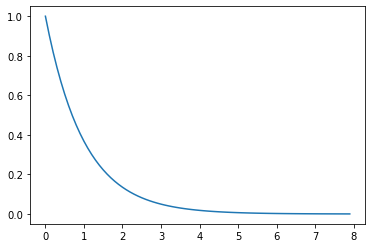

In [65]:
import matplotlib.pyplot as plt
lamda = 1
t = np.arange(0,8,0.1)
f = lamda*np.exp(-lamda*t)
plt.plot(t, f)
plt.show()

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [3]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [4]:
x = np.array([-1000, -100, -10, 0, 10, 100, 1000])
sigmoid(x)

<ipython-input-3-c808b2fd1273>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
<ipython-input-3-c808b2fd1273>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))


array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00,            nan])

计算sigmoid(1000)的时候报错

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

答：sigmoid(1000)的值太大了

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [5]:
def sigmoid(x):
    res = []
    for num in x:
        if num <= 0:
            res.append(np.exp(num) / (1 + np.exp(num)))
        else:
            res.append(1 / (1+np.exp(-num)))
    return np.array(res)
sigmoid(x)

array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00, 1.00000000e+00])

### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [6]:
def softplus(x):
    res = []
    for num in x:
        if num <= 0:
            res.append(np.log(1 + np.exp(num)))
        else:
            res.append(np.log(1 + np.exp(-num)) + num)
    return np.array(res)

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [7]:
x = np.array([-1000, -100, -10, 0, 10, 100, 1000])
softplus(x)

array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02, 1.00000000e+03])

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。